In [44]:
# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from api_credentials import client_id, client_secret
import pandas as pd
import json
import re
import matplotlib.pyplot as plt

# Initialise the Spotify client with client credentials for public data access
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [62]:
df = pd.read_csv('/Users/andrewmclaughlin/Desktop/spotify_data/archived_nmf_data/2024-2-16.csv')

In [63]:
df.head()

,Artist,Title,Playlist,Position,Followers
0,Beyoncé,TEXAS HOLD 'EM,Top 50 Australia,5,815658
1,Beyoncé,TEXAS HOLD 'EM,New Music Friday AU & NZ,1,370523
2,Beyoncé,TEXAS HOLD 'EM,Hot Hits Australia,10,1401047
3,Beyoncé,TEXAS HOLD 'EM,Fresh Country,1,379095
4,Beyoncé,TEXAS HOLD 'EM,Pop n' Fresh,4,120580


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Artist     203 non-null    object
 1   Title      203 non-null    object
 2   Playlist   203 non-null    object
 3   Position   203 non-null    int64 
 4   Followers  203 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.1+ KB


In [14]:
# Combine 'Artist' and 'Title' into a new column 'Artist_Title'
df['Artist_Title'] = df['Artist'] + " - " + df['Title']
# Find the unique values of 'Artist_Title'
unique_artist_titles = df['Artist_Title'].unique()


array(["Beyoncé - TEXAS HOLD 'EM", 'Dua Lipa - Training Season',
       'Royel Otis - Foam', 'KUČKA, Flume - One More Night',
       "Cosmo's Midnight, Franc Moody - Fantasy (feat. Franc Moody)",
       'Delta Goodrem - Hearts On The Run',
       'KAROL G, Tiësto - CONTIGO (with Tiësto)',
       'Ariana Grande, Mariah Carey - yes, and? (with Mariah Carey)',
       'Becca Hatch - Bass Keeps Calling',
       'Jennifer Lopez, Anuel AA - Rebound (feat. Anuel AA)',
       'Forest Claudette - Kobe Beef', "Sleepy Hallow - Cupid's Guidance",
       'Vampire Weekend - Capricorn', 'Polo G - Sorrys & Ferraris',
       'Bryson Tiller - Whatever She Wants', 'Pearl Jam - Dark Matter',
       'The 046, Kymza - Better Days', 'Kim Petras - Head Head Honcho',
       'Josh Ross - Matching Tattoos', 'Ūla - just a gimmick',
       'Warpaint - Common Blue',
       'Kitty Ca$h, Thundercat, James Fauntleroy - Time Machine (feat. Thundercat & James Fauntleroy)',
       'Moses, TAKTiX, KAHUKX - 3am',
       'EN

In [15]:
print(len(unique_artist_titles))

84


In [16]:


# Assuming `df` is your DataFrame with the songs' information
# and `sp` is your authenticated Spotify API client instance

def get_popularity(artist, title):
    results = sp.search(q='artist:' + artist + ' track:' + title, type='track')
    # Get the first track from the results
    track = results['tracks']['items'][0] if results['tracks']['items'] else None
    # Return the popularity score if the track was found
    return track['popularity'] if track else None

# Apply the function to each row in the DataFrame to create a new 'Popularity' column
df['Popularity'] = df.apply(lambda row: get_popularity(row['Artist'], row['Title']), axis=1)


In [19]:
sorted_df = df.sort_values(by="Popularity")

In [61]:
sorted_df.head()



,Artist,Title,Playlist,Position,Followers,Artist_Title,Popularity
135,Maina Doe,Witness,Indie Arrivals,8,70658,Maina Doe - Witness,17.0
133,Maina Doe,Witness,New Music Friday AU & NZ,49,370523,Maina Doe - Witness,17.0
134,Maina Doe,Witness,R&B Connect,15,198352,Maina Doe - Witness,17.0
152,Full Flower Moon Band,West Side,New Music Friday AU & NZ,58,370523,Full Flower Moon Band - West Side,20.0
153,Full Flower Moon Band,West Side,Front Left,35,564386,Full Flower Moon Band - West Side,20.0


In [24]:
# Assuming 'df' is your DataFrame
unique_songs = df.groupby(['Artist', 'Title']).agg({'Popularity':'first'}).reset_index()


In [29]:
sorted_unique = unique_songs.sort_values(by='Popularity', ascending=False)

In [31]:
sorted_unique.describe()

,Popularity
count,80.00000
mean,53.80000
std,16.74031
min,17.00000
25%,40.50000
50%,57.00000
75%,65.00000
max,91.00000


In [32]:
sorted_unique

,Artist,Title,Popularity
6,Beyoncé,TEXAS HOLD 'EM,91.0
18,Dua Lipa,Training Season,89.0
39,"KAROL G, Tiësto",CONTIGO (with Tiësto),86.0
8,Bryson Tiller,Whatever She Wants,79.0
4,"Ariana Grande, Mariah Carey","yes, and? (with Mariah Carey)",78.0
...,...,...,...
49,Maina Doe,Witness,17.0
12,"Cosmo's Midnight, Franc Moody",Fantasy (feat. Franc Moody),NaN
17,"Dr Packer, Angelo Ferreri",Ain't No Fool - Angelo Ferreri Remix,NaN
44,Lainey Wilson,Country's Cool Again,NaN


In [35]:
sorted_unique['Artist Title'] = sorted_unique['Artist'] + " - " + sorted_unique['Title']

In [47]:
# Selecting and renaming the columns directly without analysis
final_df = sorted_unique[['Artist Title', 'Popularity']].rename(columns={'Artist Title': 'artist_title', 'Popularity': 'popularity'})

final_df.head()


,artist_title,popularity
6,Beyoncé - TEXAS HOLD 'EM,91.0
18,Dua Lipa - Training Season,89.0
39,"KAROL G, Tiësto - CONTIGO (with Tiësto)",86.0
8,Bryson Tiller - Whatever She Wants,79.0
4,"Ariana Grande, Mariah Carey - yes, and? (with ...",78.0


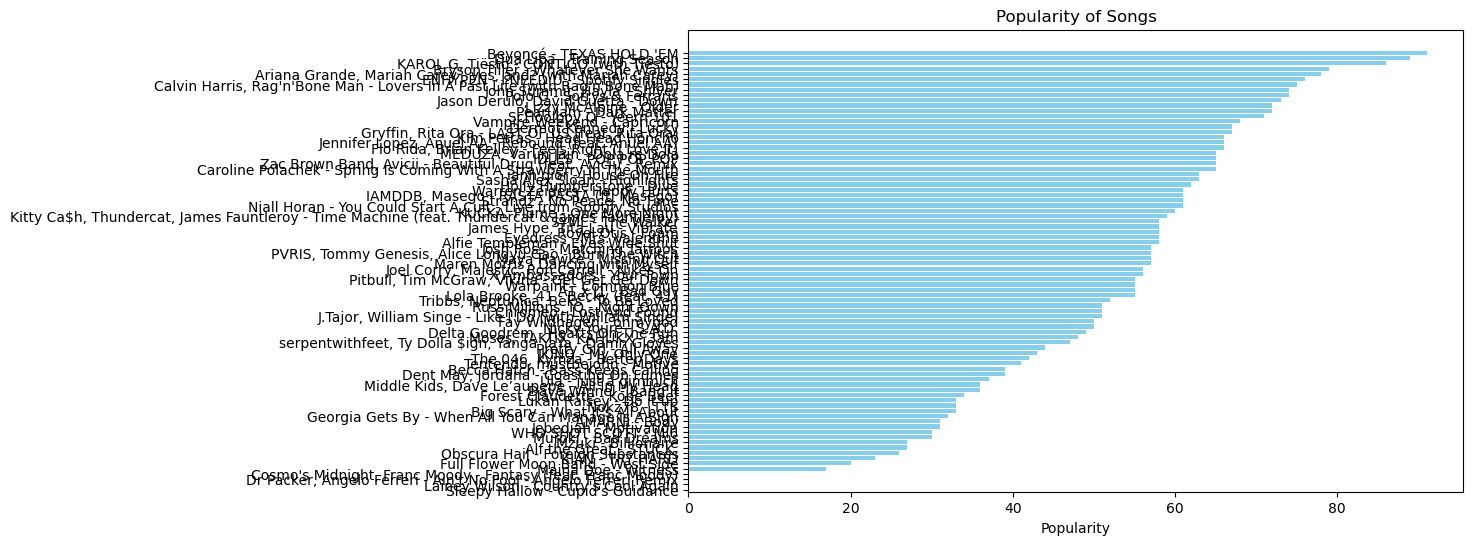

In [48]:
artist_title = final_df['artist_title']
popularity = final_df['popularity']
# Plot
plt.figure(figsize=(10, 6))
plt.barh(artist_title, popularity, color='skyblue')
plt.xlabel('Popularity')
plt.title('Popularity of Songs')
plt.gca().invert_yaxis() # Invert y-axis to have the highest popularity on top
plt.show()

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 6 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_title  84 non-null     object 
 1   popularity    80 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [57]:
final_df['popularity'].describe()

count    80.00000
mean     53.80000
std      16.74031
min      17.00000
25%      40.50000
50%      57.00000
75%      65.00000
max      91.00000
Name: popularity, dtype: float64

/var/folders/px/x65fp4pn31s5cv4gsbh_3cl80000gn/T/ipykernel_15910/1337201319.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout to make room for the x-axis labels.


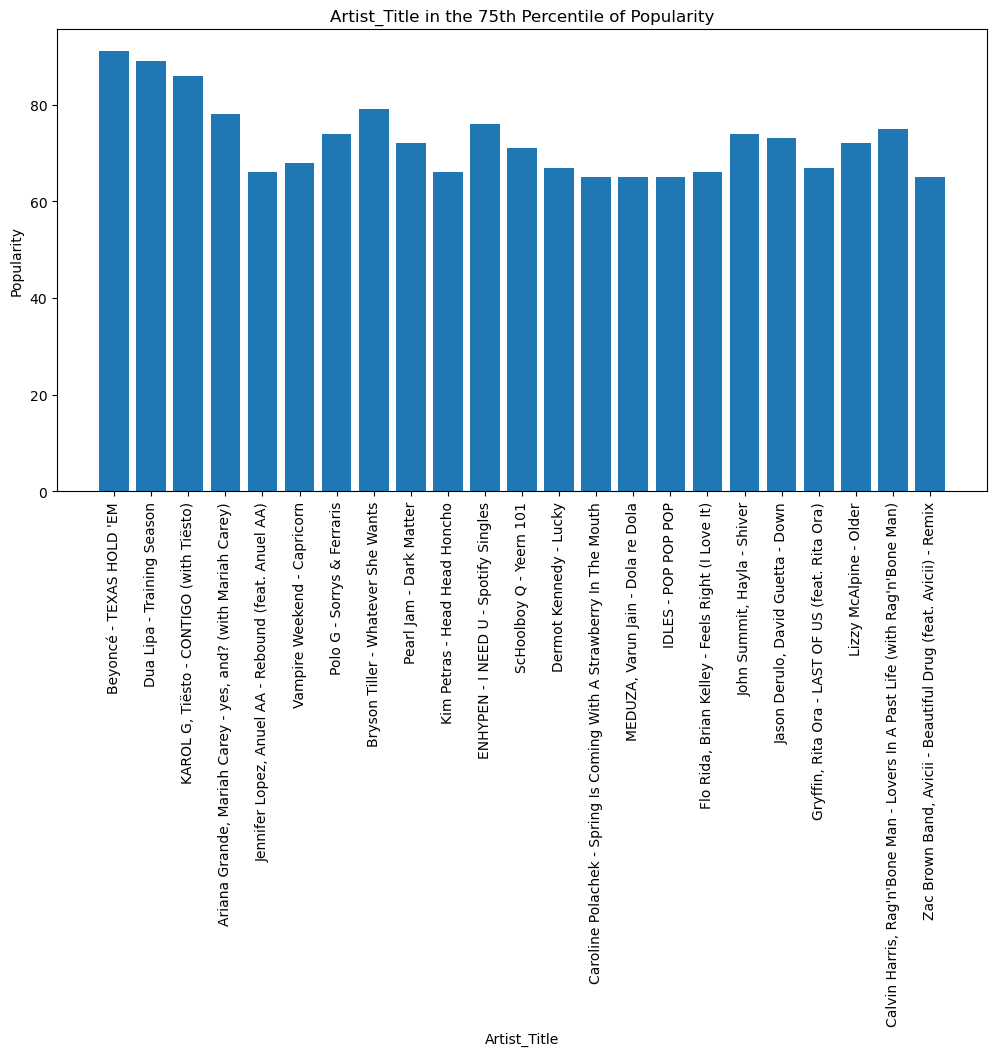

In [58]:

# To plot the data for the 75th percentile, we first need to calculate the 75th percentile value.
# However, this has already been provided in the description statistics as 65.

# We define the 75th percentile value
percentile_75th_value = 65

# We filter the dataframe to get only the rows where the 'popularity' value is at or above the 75th percentile.
df_75th_percentile = df[df['Popularity'] >= percentile_75th_value]

# Now we will plot the 'artist_title' of the songs that are in the 75th percentile of the popularity column.
# Assuming 'artist_title' is a column in our dataframe that represents the artist and title of the track.
plt.figure(figsize=(12, 6))
plt.bar(df_75th_percentile['Artist_Title'], df_75th_percentile['Popularity'])
plt.title('Artist_Title in the 75th Percentile of Popularity')
plt.xlabel('Artist_Title')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate the x-axis labels to make them readable.
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels.
plt.show()


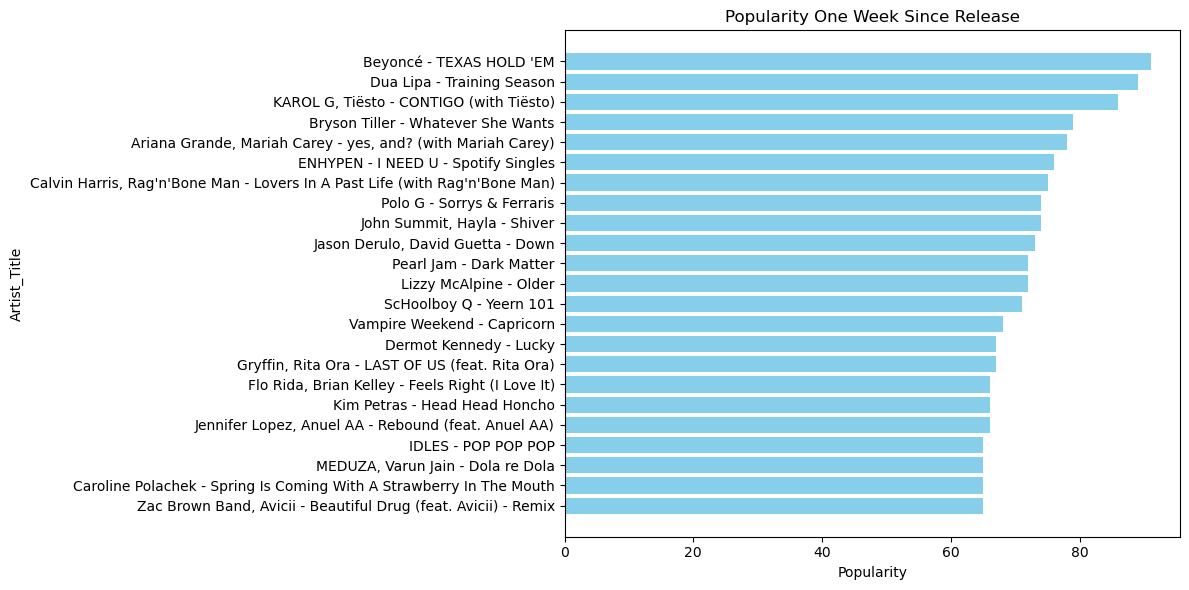

In [60]:
df_75th_percentile = df[df['Popularity'] >= percentile_75th_value]

# Sort the dataframe by 'Popularity' in descending order for the horizontal bar chart
df_75th_percentile_sorted = df_75th_percentile.sort_values(by='Popularity', ascending=False)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(df_75th_percentile_sorted['Artist_Title'], df_75th_percentile_sorted['Popularity'], color='skyblue')
plt.title('Popularity One Week Since Release')
plt.ylabel('Artist_Title')
plt.xlabel('Popularity')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest popularity on top
plt.tight_layout()  # Adjust the layout
plt.show()